In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import requests
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zwtf3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Read basic words and store them in a list
This is the Dale Chall 3000 Word List, which is one definition of words that are considered "basic" English.

In [2]:
with open('dale_chall.txt') as f:
    lines = f.readlines()
    basic_word_list = [line.strip() for line in lines]

In [3]:
#basic_word_list

## Read Concreteness_ratings_Brysbaert_et_al_BRM.txt

This file contains concreteness ratings for 40 thousand English lemma words gathered via Amazon Mechanical Turk. The ratings come from a larger list of 63 thousand words and represent all English words known to 85% of the raters.

The file contains eight columns:
1. The word
2. Whether it is a single word or a two-word expression 
3. The mean concreteness rating
4. The standard deviation of the concreteness ratings
5. The number of persons indicating they did not know the word
6. The total number of persons who rated the word
7. Percentage participants who knew the word
8. The SUBTLEX-US frequency count (on a total of 51 million; Brysbaert & New, 2009) 
9. The dominant part-of-speech usage

In [4]:
# Read the file and split lines by space
concreteness_list = []
with open('Concreteness_ratings_Brysbaert_et_al_BRM.txt', "r") as file:
    lines = file.readlines()
    column_names = lines[0].strip().split("\t") 
    for line in lines[1:]:
        values = line.strip().split("\t")
        concreteness_list.append(values)

# Create a DataFrame from the data
concreteness_df = pd.DataFrame(concreteness_list,columns=column_names)

# Print the DataFrame
concreteness_df

,Word,Bigram,Conc.M,Conc.SD,Unknown,Total,Percent_known,SUBTLEX,Dom_Pos
0,roadsweeper,0,4.85,0.37,1,27,0.96,0,0
1,traindriver,0,4.54,0.71,3,29,0.90,0,0
2,tush,0,4.45,1.01,3,25,0.88,66,0
3,hairdress,0,3.93,1.28,0,29,1.00,1,0
4,pharmaceutics,0,3.77,1.41,4,26,0.85,0,0
...,...,...,...,...,...,...,...,...,...
39949,unenvied,0,1.21,0.62,1,30,0.97,0,#N/A
39950,agnostically,0,1.2,0.5,2,27,0.93,0,#N/A
39951,conceptualistic,0,1.18,0.5,4,26,0.85,0,#N/A
39952,conventionalism,0,1.18,0.48,1,29,0.97,0,#N/A


## Read AoA_51715_words.csv 

This file contains "Age of Acquisition" (AoA) estimates for about 51k English words, which refers to the approximate age (in years) when a word was learned. Early words, being more basic, have lower average AoA.

The main columns you will be interested in are "Word" and "AoA_Kup_lem". But the others may be useful too.

In [5]:
aoa_df = pd.read_csv('AoA_51715_words.csv',encoding='unicode_escape')
aoa_df.head()

,Word,Alternative.spelling,Freq_pm,Dom_PoS_SUBTLEX,Nletters,Nphon,Nsyll,Lemma_highest_PoS,AoA_Kup,Perc_known,AoA_Kup_lem,Perc_known_lem,AoA_Bird_lem,AoA_Bristol_lem,AoA_Cort_lem,AoA_Schock
0,a,a,20415.27,Article,1,1,1,a,2.89,1.00,2.89,1.00,3.16,NaN,NaN,NaN
1,aardvark,aardvark,0.41,Noun,8,7,2,aardvark,9.89,1.00,9.89,1.00,NaN,NaN,NaN,NaN
2,abacus,abacus,0.24,Noun,6,6,3,abacus,8.69,0.65,8.69,0.65,NaN,NaN,NaN,NaN
3,abacuses,abacuses,0.02,Noun,8,9,4,abacus,NaN,NaN,8.69,0.65,NaN,NaN,NaN,NaN
4,abalone,abalone,0.51,Verb,7,7,4,abalone,12.23,0.72,12.23,0.72,NaN,NaN,NaN,NaN


In [6]:
aoa_sub = aoa_df[['Word','AoA_Kup_lem']]
aoa_sub

,Word,AoA_Kup_lem
0,a,2.89
1,aardvark,9.89
2,abacus,8.69
3,abacuses,8.69
4,abalone,12.23
...,...,...
51710,zucchini,6.79
51711,zucchinis,6.79
51712,zwieback,16.10
51713,zygote,15.38


## Read train and test data

In [7]:
train_df = pd.read_csv('WikiLarge_Train.csv',encoding='unicode_escape')
train_df

,original_text,label
0,There is manuscript evidence that Austen conti...,1
1,"In a remarkable comparative analysis , Mandaea...",1
2,"Before Persephone was released to Hermes , who...",1
3,Cogeneration plants are commonly found in dist...,1
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1
...,...,...
416763,A Duke Nukem 3D version has been sold for Xbox...,0
416764,"However , it is becoming replaced as a method ...",0
416765,There are hand gestures in both Hindu and Budd...,0
416766,"If it is necessary to use colors , try to choo...",0


Text(0, 0.5, 'Number of Labels')

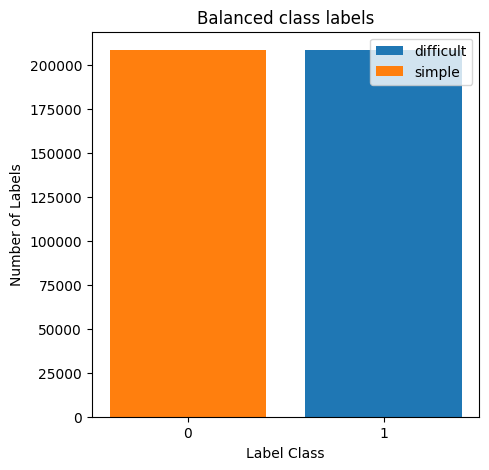

In [8]:
# Count Lables in each class: 
plt.figure(figsize =(5,5))
plt.bar(x = train_df.label.unique()[0], height= train_df.label.value_counts()[0], label = 'difficult')
plt.bar(x = train_df.label.unique()[1], height= train_df.label.value_counts()[1], label = 'simple')
plt.xticks([0,1])
plt.legend(loc = 'best')
plt.title('Balanced class labels')
plt.xlabel('Label Class')
plt.ylabel("Number of Labels")

In [9]:
train_df.info

<bound method DataFrame.info of                                             original_text  label
0       There is manuscript evidence that Austen conti...      1
1       In a remarkable comparative analysis , Mandaea...      1
2       Before Persephone was released to Hermes , who...      1
3       Cogeneration plants are commonly found in dist...      1
4       Geneva -LRB- , ; , ; , ; ; -RRB- is the second...      1
...                                                   ...    ...
416763  A Duke Nukem 3D version has been sold for Xbox...      0
416764  However , it is becoming replaced as a method ...      0
416765  There are hand gestures in both Hindu and Budd...      0
416766  If it is necessary to use colors , try to choo...      0
416767                               Calgary Stampeders ,      0

[416768 rows x 2 columns]>

In [10]:
test_df = pd.read_csv('WikiLarge_Test.csv',encoding='unicode_escape')
test_df

,id,original_text,label
0,0,-2011,NaN
1,1,-2011,NaN
2,2,-2000,NaN
3,3,-1997,NaN
4,4,1.636,NaN
...,...,...,...
119087,119087,#NAME?,NaN
119088,119088,#NAME?,NaN
119089,119089,#NAME?,NaN
119090,119090,#NAME?,NaN


In [11]:
sumission_df = pd.read_csv('sampleSubmission.csv',encoding='unicode_escape')
sumission_df

,id,label
0,0,0
1,1,0
2,2,1
3,3,1
4,4,0
...,...,...
119087,119087,0
119088,119088,1
119089,119089,1
119090,119090,1


## Cleaning

### stop words

In [12]:
# Get stopwords:
stop_word = list(stopwords.words('english'))


In [13]:
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zwtf3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zwtf3\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
%%time
re_tokenized = []
random_sample = train_df.sample(n=500, random_state=42)

CPU times: total: 0 ns
Wall time: 8.98 ms


In [15]:
random_sample['norm_text'] = (random_sample['original_text']
                   .str.lower()                              # Lowercase the text
                   .str.replace(r'\W+|\d+', ' ', regex=True)  # Remove non-alphanumeric characters and digits
                   .str.replace(r'\n', '')                   # Remove new line characters
                   .str.replace(r'_{1,2}', '')               # Remove single and double underscores
                   .str.replace(r'\s+', ' ')                  # Replace multiple spaces with a single space
                   .str.strip()                           # Remove leading and trailing spaces
                   .str.split()) 
##some sentences are not english, need to remove them

In [16]:
random_sample

,original_text,label,norm_text
8521,Diego MarÃ­a de la ConcepciÃ³n Juan Nepomuceno...,1,"[diego, marã, a, de, la, concepciã³n, juan, ne..."
182810,Some of the 1930s trams are still in regular s...,1,"[some, of, the, s, trams, are, still, in, regu..."
275464,Emperor Go-Momozono -LRB- Japan -RRB-,0,"[emperor, go, momozono, lrb, japan, rrb]"
176814,"In other countries , potassium iodate is used ...",1,"[in, other, countries, potassium, iodate, is, ..."
196293,"Located in a region called Planalto Central , ...",1,"[located, in, a, region, called, planalto, cen..."
...,...,...,...
44643,"Coleridge-Taylor was born in Holborn , London ...",1,"[coleridge, taylor, was, born, in, holborn, lo..."
214014,Inverbervie -LRB- Ordnance Survey grid referen...,0,"[inverbervie, lrb, ordnance, survey, grid, ref..."
262912,Scenario paintball is a type of paintball game...,0,"[scenario, paintball, is, a, type, of, paintba..."
182342,Priscilla remained in Montgomery after Robert ...,1,"[priscilla, remained, in, montgomery, after, r..."


### Remove stopwords

In [17]:
random_sample['original_text'] = random_sample['norm_text'].apply(lambda words: [word for word in words if word not in stop_word])

In [18]:
random_sample

,original_text,label,norm_text
8521,"[diego, marã, de, la, concepciã³n, juan, nepom...",1,"[diego, marã, a, de, la, concepciã³n, juan, ne..."
182810,"[trams, still, regular, service, virtually, un...",1,"[some, of, the, s, trams, are, still, in, regu..."
275464,"[emperor, go, momozono, lrb, japan, rrb]",0,"[emperor, go, momozono, lrb, japan, rrb]"
176814,"[countries, potassium, iodate, used, source, i...",1,"[in, other, countries, potassium, iodate, is, ..."
196293,"[located, region, called, planalto, central, c...",1,"[located, in, a, region, called, planalto, cen..."
...,...,...,...
44643,"[coleridge, taylor, born, holborn, london, sie...",1,"[coleridge, taylor, was, born, in, holborn, lo..."
214014,"[inverbervie, lrb, ordnance, survey, grid, ref...",0,"[inverbervie, lrb, ordnance, survey, grid, ref..."
262912,"[scenario, paintball, type, paintball, game, a...",0,"[scenario, paintball, is, a, type, of, paintba..."
182342,"[priscilla, remained, montgomery, robert, death]",1,"[priscilla, remained, in, montgomery, after, r..."


In [19]:
#re_tokenized

In [20]:
random_sample['total_number'] = random_sample['norm_text'].apply(lambda sum_num: len(sum_num))
random_sample['basic_number'] = random_sample['norm_text'].apply(lambda text: sum(1 for word in text if word in basic_word_list))
random_sample['basic_percentage'] =  random_sample['basic_number'] /random_sample['total_number']

In [21]:
random_sample

,original_text,label,norm_text,total_number,basic_number,basic_percentage
8521,"[diego, marã, de, la, concepciã³n, juan, nepom...",1,"[diego, marã, a, de, la, concepciã³n, juan, ne...",42,11,0.261905
182810,"[trams, still, regular, service, virtually, un...",1,"[some, of, the, s, trams, are, still, in, regu...",14,8,0.571429
275464,"[emperor, go, momozono, lrb, japan, rrb]",0,"[emperor, go, momozono, lrb, japan, rrb]",6,1,0.166667
176814,"[countries, potassium, iodate, used, source, i...",1,"[in, other, countries, potassium, iodate, is, ...",11,6,0.545455
196293,"[located, region, called, planalto, central, c...",1,"[located, in, a, region, called, planalto, cen...",18,6,0.333333
...,...,...,...,...,...,...
44643,"[coleridge, taylor, born, holborn, london, sie...",1,"[coleridge, taylor, was, born, in, holborn, lo...",24,10,0.416667
214014,"[inverbervie, lrb, ordnance, survey, grid, ref...",0,"[inverbervie, lrb, ordnance, survey, grid, ref...",26,14,0.538462
262912,"[scenario, paintball, type, paintball, game, a...",0,"[scenario, paintball, is, a, type, of, paintba...",28,15,0.535714
182342,"[priscilla, remained, montgomery, robert, death]",1,"[priscilla, remained, in, montgomery, after, r...",9,4,0.444444


### test

In [22]:
random_sample.dropna(inplace=True)

In [23]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the features and target variables
X = random_sample[['total_number', 'basic_number','basic_percentage']]
y = random_sample['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.61


### The mean concreteness rating

In [24]:
concreteness_list = concreteness_df['Word'].tolist()

In [25]:
random_sample['mean_concreteness'] = random_sample['norm_text'].apply(lambda text: sum(float(concreteness_df.loc[concreteness_df['Word'] == word, 'Conc.M'].values[0]) for word in text if word in concreteness_list))


In [26]:
random_sample

,original_text,label,norm_text,total_number,basic_number,basic_percentage,mean_concreteness
8521,"[diego, marã, de, la, concepciã³n, juan, nepom...",1,"[diego, marã, a, de, la, concepciã³n, juan, ne...",42,11,0.261905,40.25
182810,"[trams, still, regular, service, virtually, un...",1,"[some, of, the, s, trams, are, still, in, regu...",14,8,0.571429,28.02
275464,"[emperor, go, momozono, lrb, japan, rrb]",0,"[emperor, go, momozono, lrb, japan, rrb]",6,1,0.166667,12.32
176814,"[countries, potassium, iodate, used, source, i...",1,"[in, other, countries, potassium, iodate, is, ...",11,6,0.545455,23.83
196293,"[located, region, called, planalto, central, c...",1,"[located, in, a, region, called, planalto, cen...",18,6,0.333333,36.23
...,...,...,...,...,...,...,...
44643,"[coleridge, taylor, born, holborn, london, sie...",1,"[coleridge, taylor, was, born, in, holborn, lo...",24,10,0.416667,42.18
214014,"[inverbervie, lrb, ordnance, survey, grid, ref...",0,"[inverbervie, lrb, ordnance, survey, grid, ref...",26,14,0.538462,59.01
262912,"[scenario, paintball, type, paintball, game, a...",0,"[scenario, paintball, is, a, type, of, paintba...",28,15,0.535714,63.11
182342,"[priscilla, remained, montgomery, robert, death]",1,"[priscilla, remained, in, montgomery, after, r...",9,4,0.444444,11.85


### AoA_Kup_lem

In [27]:
aoa_list = aoa_sub['Word'].tolist()

In [28]:
aoa_mean_list = []
for word_list in re_tokenized:
    mean_list=[]
    for word in word_list:
        if word in aoa_list:
            mean_list.append(float(aoa_sub.loc[aoa_sub['Word'] == word, 'AoA_Kup_lem'].values[0]))
    if len(mean_list)==0:
        print(mean_list,word_list)
    else:
        aoa_mean_list.append(sum(mean_list) / len(mean_list))

In [29]:
random_sample['AoA_Kup_lem'] = random_sample['norm_text'].apply(lambda text: sum(float(aoa_sub.loc[aoa_sub['Word'] == word, 'AoA_Kup_lem'].values[0]) for word in text if word in aoa_list))


In [30]:
random_sample

,original_text,label,norm_text,total_number,basic_number,basic_percentage,mean_concreteness,AoA_Kup_lem
8521,"[diego, marã, de, la, concepciã³n, juan, nepom...",1,"[diego, marã, a, de, la, concepciã³n, juan, ne...",42,11,0.261905,40.25,87.57
182810,"[trams, still, regular, service, virtually, un...",1,"[some, of, the, s, trams, are, still, in, regu...",14,8,0.571429,28.02,86.90
275464,"[emperor, go, momozono, lrb, japan, rrb]",0,"[emperor, go, momozono, lrb, japan, rrb]",6,1,0.166667,12.32,18.14
176814,"[countries, potassium, iodate, used, source, i...",1,"[in, other, countries, potassium, iodate, is, ...",11,6,0.545455,23.83,68.45
196293,"[located, region, called, planalto, central, c...",1,"[located, in, a, region, called, planalto, cen...",18,6,0.333333,36.23,122.16
...,...,...,...,...,...,...,...,...
44643,"[coleridge, taylor, born, holborn, london, sie...",1,"[coleridge, taylor, was, born, in, holborn, lo...",24,10,0.416667,42.18,41.30
214014,"[inverbervie, lrb, ordnance, survey, grid, ref...",0,"[inverbervie, lrb, ordnance, survey, grid, ref...",26,14,0.538462,59.01,129.84
262912,"[scenario, paintball, type, paintball, game, a...",0,"[scenario, paintball, is, a, type, of, paintba...",28,15,0.535714,63.11,169.76
182342,"[priscilla, remained, montgomery, robert, death]",1,"[priscilla, remained, in, montgomery, after, r...",9,4,0.444444,11.85,26.92


In [31]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the features and target variables
X = random_sample[['total_number', 'basic_number','basic_percentage','mean_concreteness','AoA_Kup_lem']]
y = random_sample['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.57


## Features 

### SAT words percentage

## Coorelation matrix

In [32]:
correlation_matrix = random_sample.corr()[['total_number', 'basic_number','basic_percentage','mean_concreteness','AoA_Kup_lem']]

print(correlation_matrix)

                   total_number  basic_number  basic_percentage  \
label                  0.252752      0.176768         -0.027426   
total_number           1.000000      0.895823          0.203360   
basic_number           0.895823      1.000000          0.500204   
basic_percentage       0.203360      0.500204          1.000000   
mean_concreteness      0.916255      0.929209          0.363000   
AoA_Kup_lem            0.909836      0.869042          0.262374   

                   mean_concreteness  AoA_Kup_lem  
label                       0.212573     0.271954  
total_number                0.916255     0.909836  
basic_number                0.929209     0.869042  
basic_percentage            0.363000     0.262374  
mean_concreteness           1.000000     0.921407  
AoA_Kup_lem                 0.921407     1.000000  


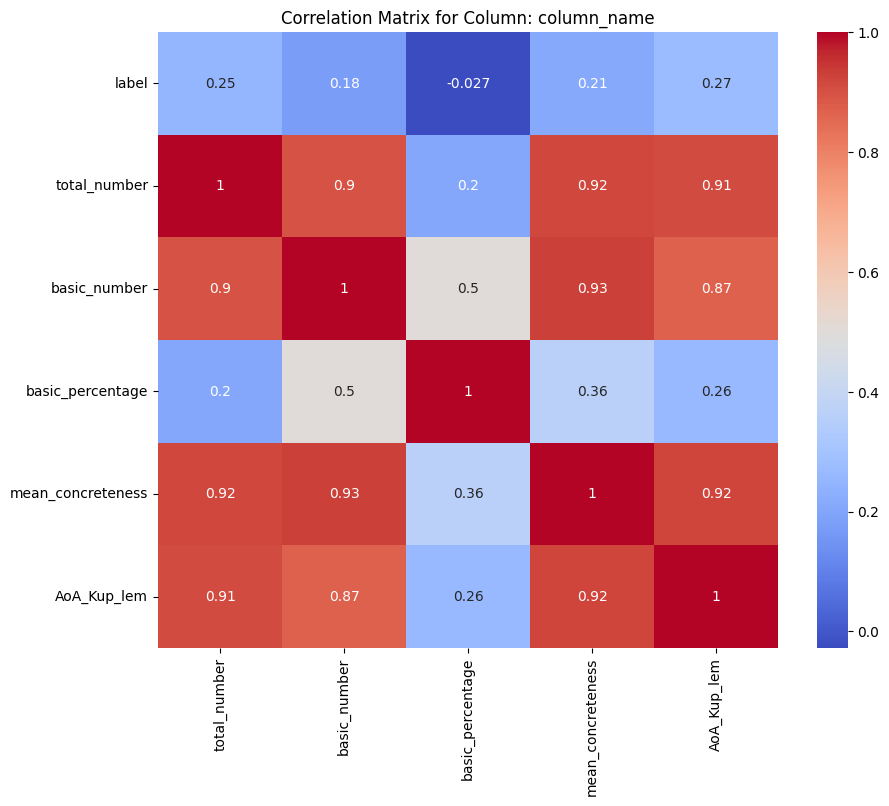

In [33]:
# Generate the heatmap plot
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Column: column_name')
plt.show()